# Import Libraries and data set

**Import the usual libraries for pandas and plotting**

In [117]:
import pyforest

In [118]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline

In [119]:
# For supressing unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [122]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc

### Get the Data

** Use pandas to read loan_data.csv**

> Our Target Variable is "not.fully.paid". If not fully paid, then value = 1, if fully paid, then value = 0

In [123]:
df = pd.read_csv(r'loan_data.csv')
df.head()

<IPython.core.display.Javascript object>

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Check out the info(), head(), and describe() methods on loans

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [125]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [126]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [127]:
# Example of how we can see the distribution of any variable with multiple classes

print("Following is a breakup of credit approval status. 1 means approved credit, 0 means not approved.")
print(df['credit.policy'].value_counts())

Following is a breakup of credit approval status. 1 means approved credit, 0 means not approved.
1    7710
0    1868
Name: credit.policy, dtype: int64


In [128]:
df.shape

(9578, 14)

### Target / Output Variable

In [129]:
# Distribution of output / target variable by the classes it has (it has 2 classes, 0 and 1)

df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

Question : What do you think about the above distribution ?

# Exploratory Data Analysis

### Histogram of FICO scores by credit approval status

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, 'FICO score')

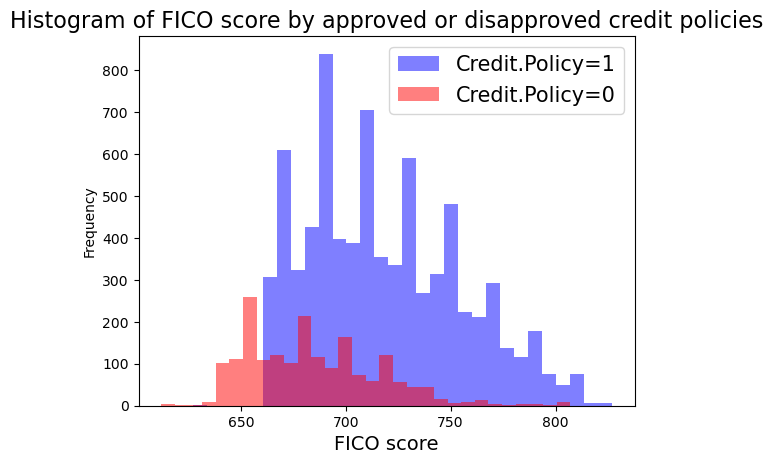

In [130]:
df[df['credit.policy']==1]['fico'].plot.hist(bins=30,alpha=0.5,color='blue', label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].plot.hist(bins=30,alpha=0.5, color='red', label='Credit.Policy=0')
plt.legend(fontsize=15)
plt.title ("Histogram of FICO score by approved or disapproved credit policies", fontsize=16)
plt.xlabel("FICO score", fontsize=14)

### Presence or absence of statistical difference of various factors between credit approval status

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Interest rate')

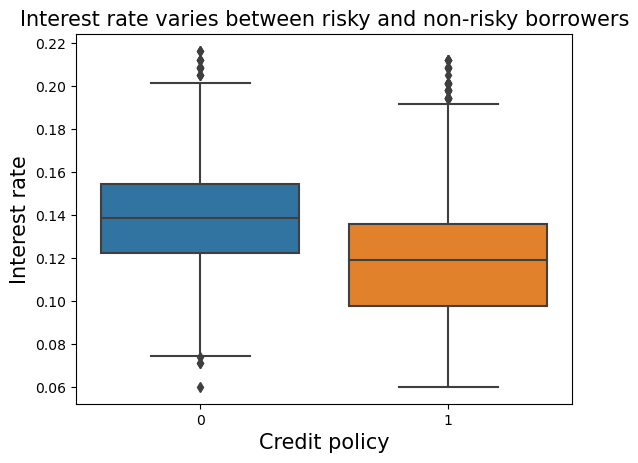

In [131]:
sns.boxplot(x=df['credit.policy'],y=df['int.rate'])
plt.title("Interest rate varies between risky and non-risky borrowers", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Interest rate",fontsize=15)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Log. annual income')

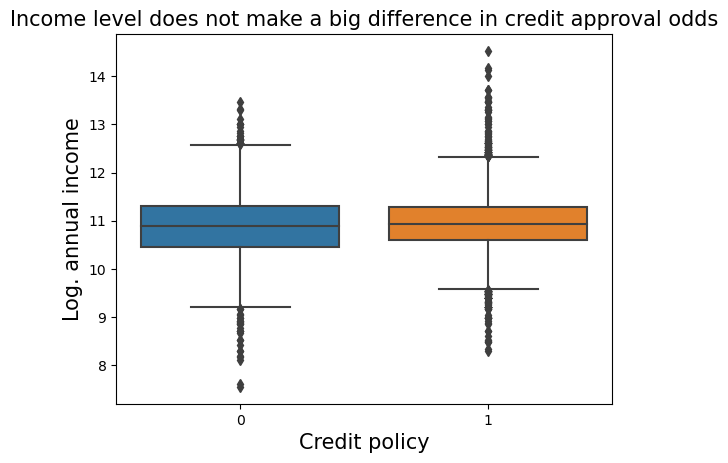

In [132]:
sns.boxplot(x=df['credit.policy'],y=df['log.annual.inc'])
plt.title("Income level does not make a big difference in credit approval odds", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Log. annual income",fontsize=15)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Days with credit line')

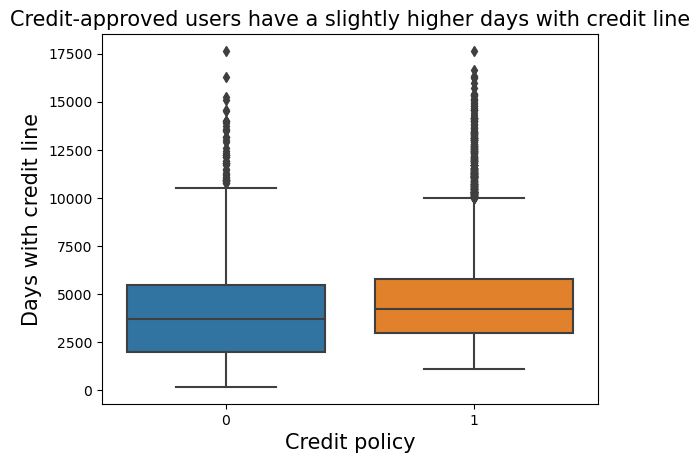

In [133]:
sns.boxplot(x=df['credit.policy'],y=df['days.with.cr.line'])
plt.title("Credit-approved users have a slightly higher days with credit line", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Days with credit line",fontsize=15)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Debt-to-income ratio')

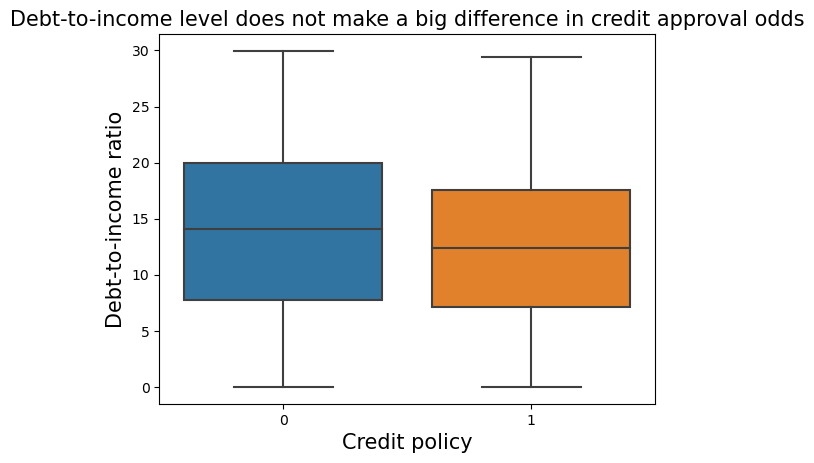

In [134]:
sns.boxplot(x=df['credit.policy'],y=df['dti'])
plt.title("Debt-to-income level does not make a big difference in credit approval odds", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Debt-to-income ratio",fontsize=15)

### Countplot of loans by purpose, with the color hue defined by not.fully.paid

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Purpose')

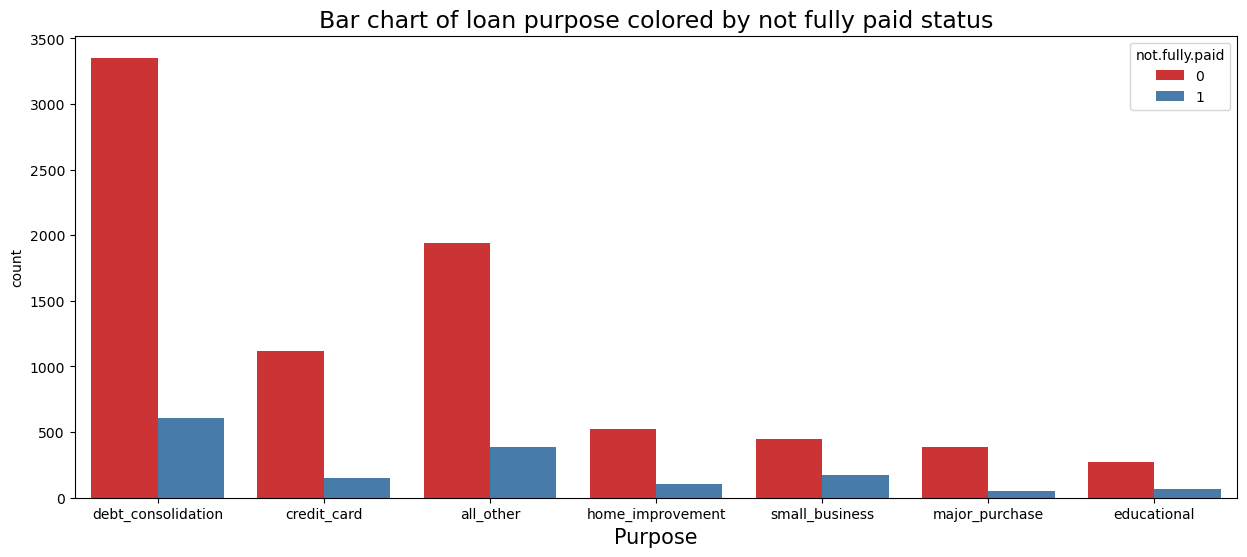

In [135]:
plt.figure(figsize=(15,6))
sns.countplot(x='purpose',hue='not.fully.paid',data=df, palette='Set1')
plt.title("Bar chart of loan purpose colored by not fully paid status", fontsize=17)
plt.xlabel("Purpose", fontsize=15)

### Trend between FICO score and interest rate

<IPython.core.display.Javascript object>

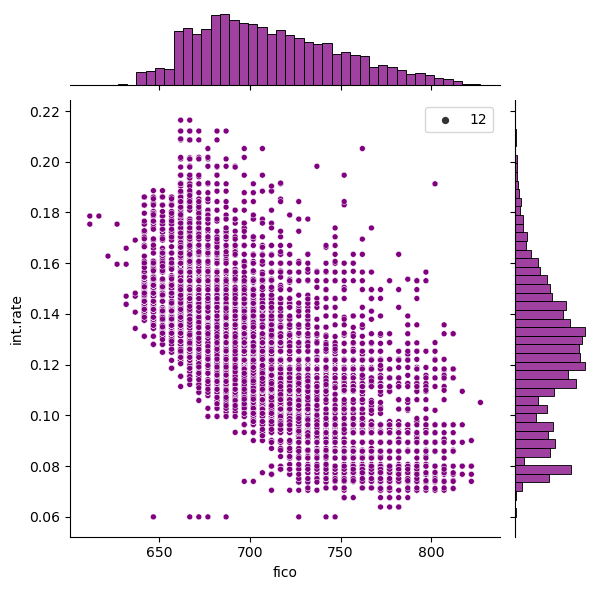

In [136]:
sns.jointplot(x='fico',y='int.rate',data=df, color='purple', size=12)

# Setting up the Data
## Categorical Features

The **purpose** column as categorical. We transform them using dummy variables so sklearn will be able to understand them.

In [137]:
df_final = pd.get_dummies(df,['purpose'],drop_first=False)

<IPython.core.display.Javascript object>

In [138]:
df_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [139]:
df.shape

(9578, 14)

In [140]:
df_final.shape

(9578, 20)

In [141]:
x = df_final.drop('not.fully.paid',axis=1)
y = df_final['not.fully.paid']

# Multiple Models

## Logestic Regression

### Logestic Regression, split size 0.3

#### Test train split

In [142]:
xtrain_3,xtest_3,ytrain_3,ytest_3 = train_test_split(x,y,test_size=0.3,stratify=y,random_state=99)

In [143]:
xtrain_3.shape,xtest_3.shape,ytrain_3.shape,ytest_3.shape

((6704, 19), (2874, 19), (6704,), (2874,))

#### Model training

In [144]:
logreg = LogisticRegression()
logreg.fit(xtrain_3, ytrain_3)

LogisticRegression()

#### Accuracy

In [145]:
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(logreg.score(xtrain_3, ytrain_3)))

Accuracy of logistic regression classifier on train set: 0.840


In [146]:
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(xtest_3, ytest_3)))

Accuracy of logistic regression classifier on test set: 0.838


#### Confusion Matrix 

In [147]:
ypred_3 = logreg.predict(xtest_3)

```python
confusion_matrix = confusion_matrix(ytest_3, ypred_3)
print(confusion_matrix)
```

###### Alternate Way

In [148]:
ytest_3.shape,ypred_3.shape

((2874,), (2874,))

In [149]:
y_test_3 = ytest_3.values.reshape(-1)

In [150]:
pd.crosstab(y_test_3, ypred_3, rownames=['Actual'], colnames=['Predicted'], margins=True)

<IPython.core.display.Javascript object>

Predicted,0,1,All
Actual,,,
0,2404,10,2414
1,457,3,460
All,2861,13,2874


#### Metrices Report

In [151]:
print(classification_report(y_test_3, ypred_3))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2414
           1       0.23      0.01      0.01       460

    accuracy                           0.84      2874
   macro avg       0.54      0.50      0.46      2874
weighted avg       0.74      0.84      0.77      2874



In [152]:
y_pred_proba_3 = logreg.predict_proba(xtest_3)
y_pred_proba_3

array([[0.88274065, 0.11725935],
       [0.86041586, 0.13958414],
       [0.81094471, 0.18905529],
       ...,
       [0.73238172, 0.26761828],
       [0.89398603, 0.10601397],
       [0.87750442, 0.12249558]])

In [153]:
y_pred_proba_3 = y_pred_proba_3[:,1]
y_pred_proba_3

array([0.11725935, 0.13958414, 0.18905529, ..., 0.26761828, 0.10601397,
       0.12249558])

#### ROC curve and AUC

In [154]:
# Calculate ROC curve and AUC
roc_auc_3 = roc_auc_score(ytest_3, y_pred_proba_3)
roc_auc_3

0.6423300673606859

In [155]:
fpr_3, tpr_3, thresholds_3 = roc_curve(ytest_3, y_pred_proba_3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

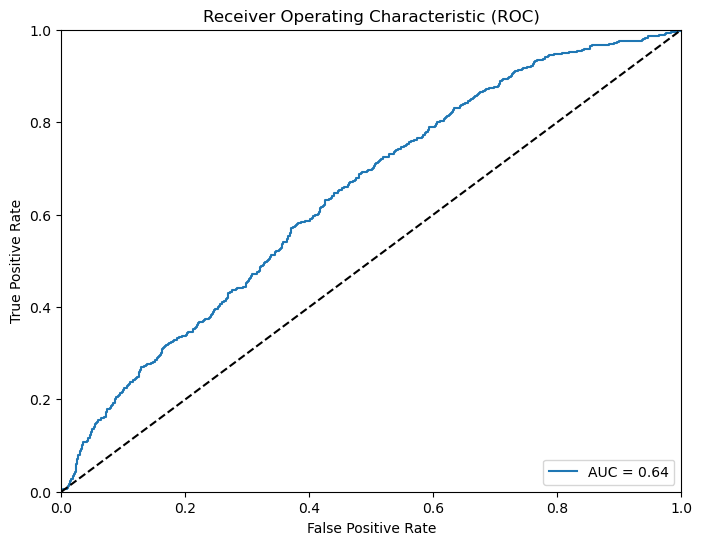

In [156]:
# Plot ROC curve and Show AUC value
plt.figure(figsize=(8, 6))
plt.plot(fpr_3, tpr_3, label=f'AUC = {roc_auc_3:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [157]:
# Calculate precision-recall curve
precision_3, recall_3, thresholds_3 = precision_recall_curve(y_test_3, y_pred_proba_3)
pr_auc_3 = auc(recall_3, precision_3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

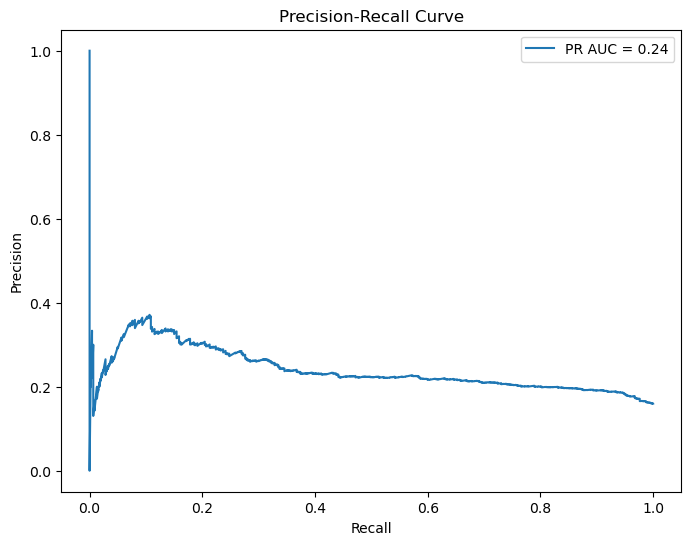

In [158]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_3, precision_3, label=f'PR AUC = {pr_auc_3:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

### Logestic Regression, split size 0.25

#### Test train split

In [159]:
xtrain_25,xtest_25,ytrain_25,ytest_25 = train_test_split(x,y,test_size=0.25,stratify=y,random_state=99)

In [160]:
xtrain_25.shape,xtest_25.shape,ytrain_25.shape,ytest_25.shape

((7183, 19), (2395, 19), (7183,), (2395,))

#### Model training

In [161]:
logreg_25 = LogisticRegression()
logreg_25.fit(xtrain_25, ytrain_25)

LogisticRegression()

#### Accuracy

In [162]:
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(logreg_25.score(xtrain_25, ytrain_25)))

Accuracy of logistic regression classifier on train set: 0.839


In [163]:
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg_25.score(xtest_25, ytest_25)))

Accuracy of logistic regression classifier on test set: 0.838


#### Confusion Matrix 

In [164]:
ypred_25 = logreg.predict(xtest_25)

```python
confusion_matrix = confusion_matrix(ytest_3, ypred_3)
print(confusion_matrix)
```

###### Alternate Way

In [165]:
ytest_25.shape,ypred_25.shape

((2395,), (2395,))

In [166]:
y_test_25 = ytest_25.values.reshape(-1)

In [167]:
pd.crosstab(y_test_25, ypred_25, rownames=['Actual'], colnames=['Predicted'], margins=True)

<IPython.core.display.Javascript object>

Predicted,0,1,All
Actual,,,
0,2004,8,2012
1,380,3,383
All,2384,11,2395


#### Metrices Report

In [168]:
print(classification_report(y_test_25, ypred_25))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2012
           1       0.27      0.01      0.02       383

    accuracy                           0.84      2395
   macro avg       0.56      0.50      0.46      2395
weighted avg       0.75      0.84      0.77      2395



In [169]:
y_pred_proba_25 = logreg.predict_proba(xtest_25)
y_pred_proba_25

array([[0.75513412, 0.24486588],
       [0.80948704, 0.19051296],
       [0.7653612 , 0.2346388 ],
       ...,
       [0.79786067, 0.20213933],
       [0.87900693, 0.12099307],
       [0.79560993, 0.20439007]])

In [170]:
y_pred_proba_25 = y_pred_proba_25[:,1]
y_pred_proba_25

array([0.24486588, 0.19051296, 0.2346388 , ..., 0.20213933, 0.12099307,
       0.20439007])

#### ROC curve and AUC

In [171]:
# Calculate ROC curve and AUC
roc_auc_25 = roc_auc_score(ytest_25, y_pred_proba_25)
roc_auc_25

0.6393531759832649

In [172]:
fpr_25, tpr_25, thresholds_25 = roc_curve(ytest_25, y_pred_proba_25)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

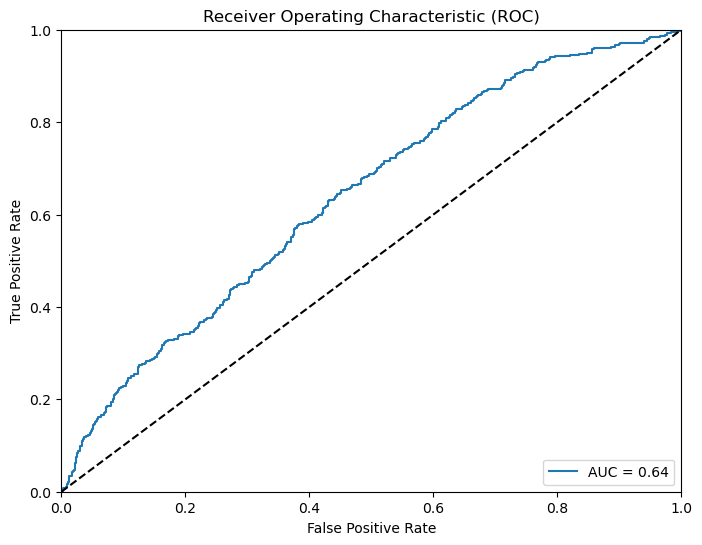

In [173]:
# Plot ROC curve and Show AUC value
plt.figure(figsize=(8, 6))
plt.plot(fpr_25, tpr_25, label=f'AUC = {roc_auc_25:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [174]:
# Calculate precision-recall curve
precision_25, recall_25, thresholds_25 = precision_recall_curve(y_test_25, y_pred_proba_25)
pr_auc_25 = auc(recall_25, precision_25)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

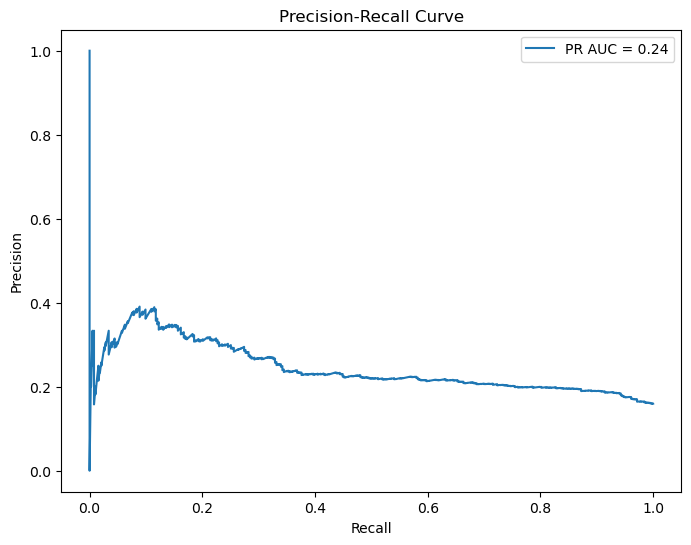

In [175]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_25, precision_25, label=f'PR AUC = {pr_auc_25:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

### Logestic Regression, split size 0.2

#### Test train split

In [176]:
xtrain_2,xtest_2,ytrain_2,ytest_2 = train_test_split(x,y,test_size=0.2,stratify=y,random_state=99)

In [177]:
xtrain_2.shape,xtest_2.shape,ytrain_2.shape,ytest_2.shape

((7662, 19), (1916, 19), (7662,), (1916,))

#### Model training

In [178]:
logreg_2 = LogisticRegression()
logreg_2.fit(xtrain_2, ytrain_2)

LogisticRegression()

#### Accuracy

In [179]:
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(logreg_2.score(xtrain_2, ytrain_2)))

Accuracy of logistic regression classifier on train set: 0.839


In [180]:
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg_2.score(xtest_2, ytest_2)))

Accuracy of logistic regression classifier on test set: 0.838


#### Confusion Matrix 

In [181]:
ypred_2 = logreg.predict(xtest_2)

```python
confusion_matrix = confusion_matrix(ytest_3, ypred_3)
print(confusion_matrix)
```

###### Alternate Way

In [182]:
ytest_2.shape,ypred_2.shape

((1916,), (1916,))

In [183]:
y_test_2 = ytest_2.values.reshape(-1)

In [184]:
pd.crosstab(y_test_2, ypred_2, rownames=['Actual'], colnames=['Predicted'], margins=True)

<IPython.core.display.Javascript object>

Predicted,0,1,All
Actual,,,
0,1602,7,1609
1,304,3,307
All,1906,10,1916


#### Metrices Report

In [185]:
print(classification_report(y_test_2, ypred_2))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1609
           1       0.30      0.01      0.02       307

    accuracy                           0.84      1916
   macro avg       0.57      0.50      0.47      1916
weighted avg       0.75      0.84      0.77      1916



In [186]:
y_pred_proba_2 = logreg.predict_proba(xtest_2)
y_pred_proba_2

array([[0.87460584, 0.12539416],
       [0.8965465 , 0.1034535 ],
       [0.78895263, 0.21104737],
       ...,
       [0.81507797, 0.18492203],
       [0.90105584, 0.09894416],
       [0.6745833 , 0.3254167 ]])

In [187]:
y_pred_proba_2 = y_pred_proba_2[:,1]
y_pred_proba_2

array([0.12539416, 0.1034535 , 0.21104737, ..., 0.18492203, 0.09894416,
       0.3254167 ])

#### ROC curve and AUC

In [188]:
# Calculate ROC curve and AUC
roc_auc_2 = roc_auc_score(ytest_2, y_pred_proba_2)
roc_auc_2

0.6454633241761022

In [189]:
fpr_2, tpr_2, thresholds_2 = roc_curve(ytest_2, y_pred_proba_2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

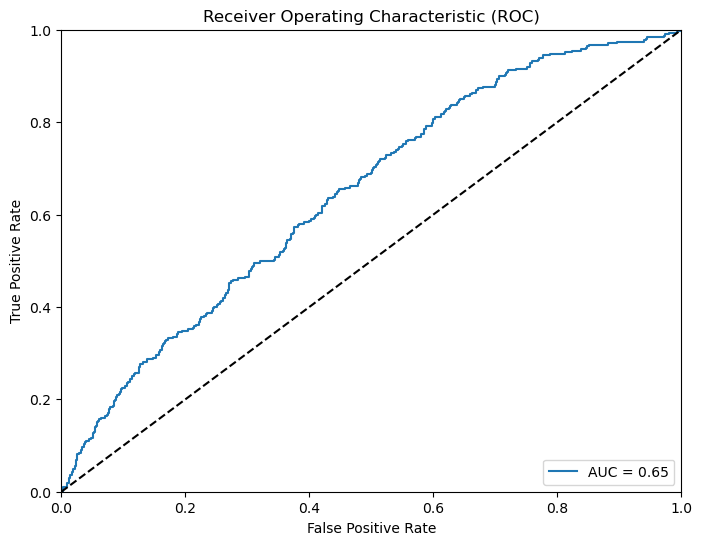

In [190]:
# Plot ROC curve and Show AUC value
plt.figure(figsize=(8, 6))
plt.plot(fpr_2, tpr_2, label=f'AUC = {roc_auc_2:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [191]:
# Calculate precision-recall curve
precision_2, recall_2, thresholds_2 = precision_recall_curve(y_test_2, y_pred_proba_2)
pr_auc_2 = auc(recall_2, precision_2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

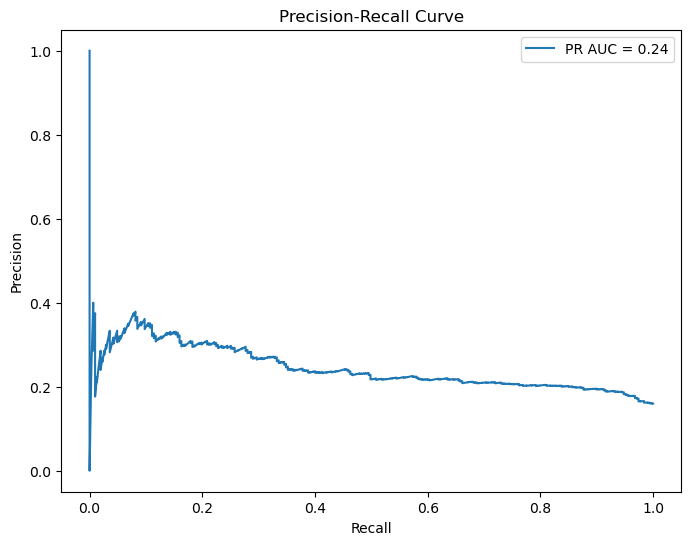

In [192]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_2, precision_2, label=f'PR AUC = {pr_auc_2:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

## Decision Tree

### Training a Decision Tree Model with split size 0.3

#### Test train split

In [193]:
xtrain_3,xtest_3,ytrain_3,ytest_3 = train_test_split(x,y,test_size=0.3,stratify=y,random_state=99)

In [194]:
xtrain_3.shape,xtest_3.shape,ytrain_3.shape,ytest_3.shape

((6704, 19), (2874, 19), (6704,), (2874,))

#### Model training

In [195]:
dtree = DecisionTreeClassifier()

In [196]:
dtree.fit(xtrain_3, ytrain_3)

DecisionTreeClassifier()

#### Accuracy

In [197]:
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(dtree.score(xtrain_3, ytrain_3)))

Accuracy of logistic regression classifier on train set: 1.000


In [198]:
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(dtree.score(xtest_3, ytest_3)))

Accuracy of logistic regression classifier on test set: 0.747


#### Dealing with overfitting

In [199]:
dtree = DecisionTreeClassifier(min_samples_split=25,min_samples_leaf=30)
dtree.fit(xtrain_3, ytrain_3)
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(dtree.score(xtrain_3, ytrain_3)))
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(dtree.score(xtest_3, ytest_3)))

Accuracy of logistic regression classifier on train set: 0.846
Accuracy of logistic regression classifier on test set: 0.823


In [200]:
dtree = DecisionTreeClassifier(max_depth=4)
dtree.fit(xtrain_3, ytrain_3)
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(dtree.score(xtrain_3, ytrain_3)))
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(dtree.score(xtest_3, ytest_3)))

Accuracy of logistic regression classifier on train set: 0.844
Accuracy of logistic regression classifier on test set: 0.834


#### Confusion Matrix 

In [201]:
ypred_3 = dtree.predict(xtest_3)

```python
confusion_matrix = confusion_matrix(ytest_3, ypred_3)
print(confusion_matrix)
```

###### Alternate Way

In [202]:
ytest_3.shape,ypred_3.shape

((2874,), (2874,))

In [203]:
pd.crosstab(ytest_3, ypred_3, rownames=['Actual'], colnames=['Predicted'], margins=True)

<IPython.core.display.Javascript object>

Predicted,0,1,All
Actual,,,
0,2396,18,2414
1,458,2,460
All,2854,20,2874


#### Metrices Report

In [204]:
print(classification_report(ytest_3, ypred_3))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2414
           1       0.10      0.00      0.01       460

    accuracy                           0.83      2874
   macro avg       0.47      0.50      0.46      2874
weighted avg       0.72      0.83      0.77      2874



In [205]:
y_pred_proba_3 = dtree.predict_proba(xtest_3)
y_pred_proba_3

array([[0.85640521, 0.14359479],
       [0.85640521, 0.14359479],
       [0.85640521, 0.14359479],
       ...,
       [0.79136691, 0.20863309],
       [0.6147541 , 0.3852459 ],
       [0.85640521, 0.14359479]])

In [206]:
y_pred_proba_3 = y_pred_proba_3[:,1]
y_pred_proba_3

array([0.14359479, 0.14359479, 0.14359479, ..., 0.20863309, 0.3852459 ,
       0.14359479])

#### ROC curve and AUC

In [207]:
# Calculate ROC curve and AUC
roc_auc_3 = roc_auc_score(ytest_3, y_pred_proba_3)
roc_auc_3

0.6137576095961961

In [208]:
fpr_3, tpr_3, thresholds_3 = roc_curve(ytest_3, y_pred_proba_3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

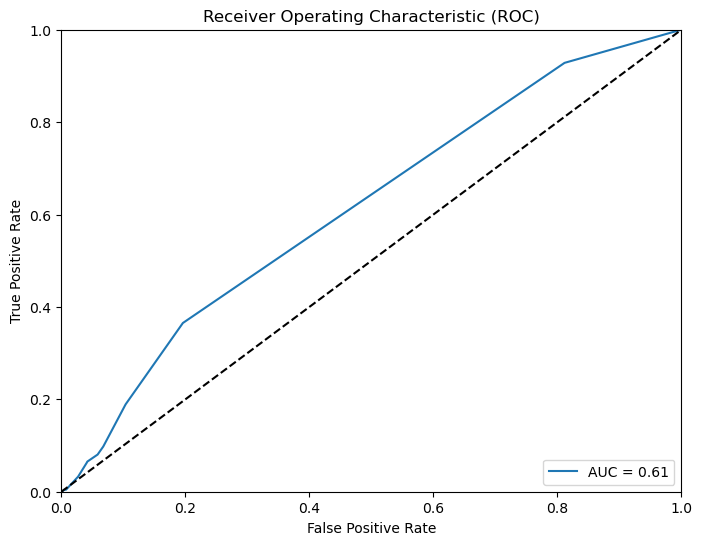

In [209]:
# Plot ROC curve and Show AUC value
plt.figure(figsize=(8, 6))
plt.plot(fpr_3, tpr_3, label=f'AUC = {roc_auc_3:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [210]:
# Calculate precision-recall curve
precision_3, recall_3, thresholds_3 = precision_recall_curve(ytest_3, y_pred_proba_3)
pr_auc_3 = auc(recall_3, precision_3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

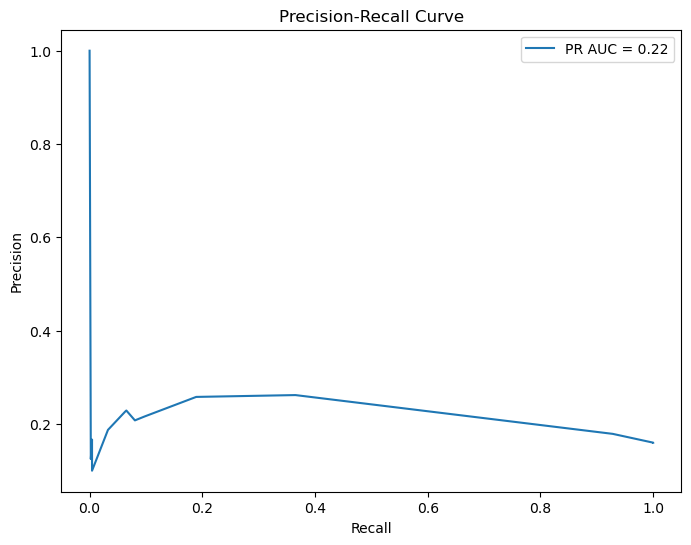

In [211]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_3, precision_3, label=f'PR AUC = {pr_auc_3:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

### Training a Decision Tree Model with split size 0.25

#### Test train split

In [212]:
xtrain_25,xtest_25,ytrain_25,ytest_25 = train_test_split(x,y,test_size=0.25,stratify=y,random_state=99)

In [213]:
xtrain_25.shape,xtest_25.shape,ytrain_25.shape,ytest_25.shape

((7183, 19), (2395, 19), (7183,), (2395,))

#### Model training

In [214]:
dtree_25 = DecisionTreeClassifier()

In [215]:
dtree_25.fit(xtrain_25, ytrain_25)

DecisionTreeClassifier()

#### Accuracy

In [216]:
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(dtree_25.score(xtrain_25, ytrain_25)))

Accuracy of logistic regression classifier on train set: 1.000


In [217]:
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(dtree_25.score(xtest_25, ytest_25)))

Accuracy of logistic regression classifier on test set: 0.741


#### Dealing with overfitting

In [218]:
dtree_25 = DecisionTreeClassifier(min_samples_split=25,min_samples_leaf=30)
dtree_25.fit(xtrain_25, ytrain_25)
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(dtree_25.score(xtrain_25, ytrain_25)))
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(dtree_25.score(xtest_25, ytest_25)))

Accuracy of logistic regression classifier on train set: 0.846
Accuracy of logistic regression classifier on test set: 0.820


In [219]:
dtree_25 = DecisionTreeClassifier(max_depth=5)
dtree_25.fit(xtrain_25, ytrain_25)
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(dtree_25.score(xtrain_25, ytrain_25)))
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(dtree_25.score(xtest_25, ytest_25)))

Accuracy of logistic regression classifier on train set: 0.845
Accuracy of logistic regression classifier on test set: 0.835


#### Confusion Matrix 

In [220]:
ypred_25 = dtree.predict(xtest_25)

```python
confusion_matrix = confusion_matrix(ytest_3, ypred_3)
print(confusion_matrix)
```

###### Alternate Way

In [221]:
ytest_25.shape,ypred_25.shape

((2395,), (2395,))

In [222]:
pd.crosstab(ytest_25, ypred_25, rownames=['Actual'], colnames=['Predicted'], margins=True)

<IPython.core.display.Javascript object>

Predicted,0,1,All
Actual,,,
0,1996,16,2012
1,381,2,383
All,2377,18,2395


#### Metrices Report

In [223]:
print(classification_report(ytest_25, ypred_25))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2012
           1       0.11      0.01      0.01       383

    accuracy                           0.83      2395
   macro avg       0.48      0.50      0.46      2395
weighted avg       0.72      0.83      0.77      2395



In [224]:
y_pred_proba_25 = dtree.predict_proba(xtest_25)
y_pred_proba_25

array([[0.79136691, 0.20863309],
       [0.6147541 , 0.3852459 ],
       [0.79136691, 0.20863309],
       ...,
       [0.85640521, 0.14359479],
       [0.85640521, 0.14359479],
       [0.85640521, 0.14359479]])

In [225]:
y_pred_proba_25 = y_pred_proba_25[:,1]
y_pred_proba_25

array([0.20863309, 0.3852459 , 0.20863309, ..., 0.14359479, 0.14359479,
       0.14359479])

#### ROC curve and AUC

In [226]:
# Calculate ROC curve and AUC
roc_auc_25 = roc_auc_score(ytest_25, y_pred_proba_25)
roc_auc_25

0.602875566444674

In [227]:
fpr_25, tpr_25, thresholds_25 = roc_curve(ytest_25, y_pred_proba_25)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

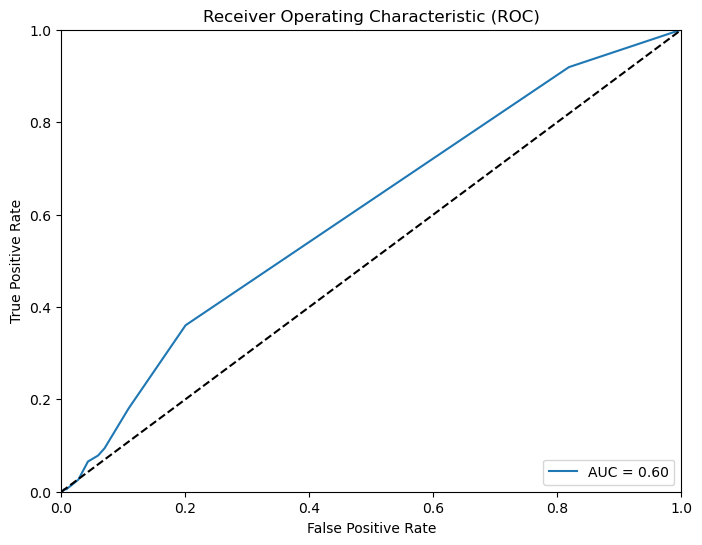

In [228]:
# Plot ROC curve and Show AUC value
plt.figure(figsize=(8, 6))
plt.plot(fpr_25, tpr_25, label=f'AUC = {roc_auc_25:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [229]:
# Calculate precision-recall curve
precision_25, recall_25, thresholds_25 = precision_recall_curve(ytest_25, y_pred_proba_25)
pr_auc_25 = auc(recall_25, precision_25)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

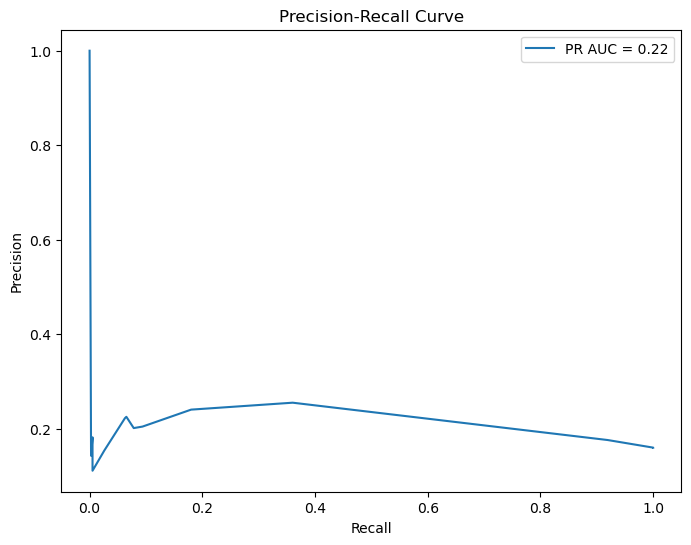

In [230]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_25, precision_25, label=f'PR AUC = {pr_auc_25:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

### Training a Decision Tree Model with split size 0.2

#### Test train split

In [231]:
xtrain_2,xtest_2,ytrain_2,ytest_2 = train_test_split(x,y,test_size=0.2,stratify=y,random_state=99)

In [232]:
xtrain_2.shape,xtest_2.shape,ytrain_2.shape,ytest_2.shape

((7662, 19), (1916, 19), (7662,), (1916,))

#### Model training

In [233]:
dtree_2 = DecisionTreeClassifier()

In [234]:
dtree_2.fit(xtrain_2, ytrain_2)

DecisionTreeClassifier()

#### Accuracy

In [235]:
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(dtree_2.score(xtrain_2, ytrain_2)))

Accuracy of logistic regression classifier on train set: 1.000


In [236]:
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(dtree_2.score(xtest_2, ytest_2)))

Accuracy of logistic regression classifier on test set: 0.734


#### Dealing with overfitting

In [237]:
dtree_2 = DecisionTreeClassifier(min_samples_split=25,min_samples_leaf=30)
dtree_2.fit(xtrain_2, ytrain_2)
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(dtree_2.score(xtrain_2, ytrain_2)))
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(dtree_2.score(xtest_2, ytest_2)))

Accuracy of logistic regression classifier on train set: 0.843
Accuracy of logistic regression classifier on test set: 0.820


In [238]:
dtree_2 = DecisionTreeClassifier(max_depth=5)
dtree_2.fit(xtrain_2, ytrain_2)
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(dtree_2.score(xtrain_2, ytrain_2)))
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(dtree_2.score(xtest_2, ytest_2)))

Accuracy of logistic regression classifier on train set: 0.847
Accuracy of logistic regression classifier on test set: 0.832


#### Confusion Matrix 

In [239]:
ypred_2 = dtree.predict(xtest_2)

```python
confusion_matrix = confusion_matrix(ytest_3, ypred_3)
print(confusion_matrix)
```

###### Alternate Way

In [240]:
ytest_2.shape,ypred_2.shape

((1916,), (1916,))

In [241]:
pd.crosstab(ytest_2, ypred_2, rownames=['Actual'], colnames=['Predicted'], margins=True)

<IPython.core.display.Javascript object>

Predicted,0,1,All
Actual,,,
0,1597,12,1609
1,305,2,307
All,1902,14,1916


#### Metrices Report

In [242]:
print(classification_report(ytest_2, ypred_2))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1609
           1       0.14      0.01      0.01       307

    accuracy                           0.83      1916
   macro avg       0.49      0.50      0.46      1916
weighted avg       0.73      0.83      0.77      1916



In [243]:
y_pred_proba_2 = dtree.predict_proba(xtest_2)
y_pred_proba_2

array([[0.95775941, 0.04224059],
       [0.85640521, 0.14359479],
       [0.85640521, 0.14359479],
       ...,
       [0.85640521, 0.14359479],
       [0.95775941, 0.04224059],
       [0.7120743 , 0.2879257 ]])

In [244]:
y_pred_proba_2 = y_pred_proba_2[:,1]
y_pred_proba_2

array([0.04224059, 0.14359479, 0.14359479, ..., 0.14359479, 0.04224059,
       0.2879257 ])

#### ROC curve and AUC

In [245]:
# Calculate ROC curve and AUC
roc_auc_2 = roc_auc_score(ytest_2, y_pred_proba_2)
roc_auc_2

0.6142322400665636

In [246]:
fpr_2, tpr_2, thresholds_2 = roc_curve(ytest_2, y_pred_proba_2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

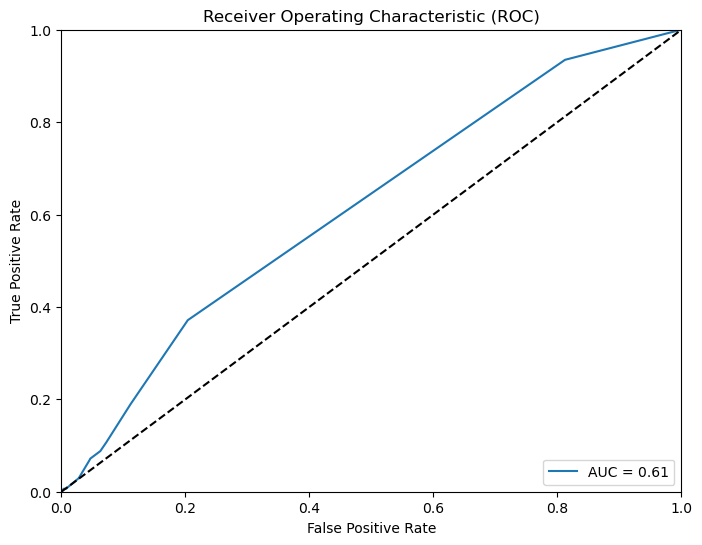

In [247]:
# Plot ROC curve and Show AUC value
plt.figure(figsize=(8, 6))
plt.plot(fpr_2, tpr_2, label=f'AUC = {roc_auc_2:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [248]:
# Calculate precision-recall curve
precision_2, recall_2, thresholds_2 = precision_recall_curve(ytest_2, y_pred_proba_2)
pr_auc_2 = auc(recall_2, precision_2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

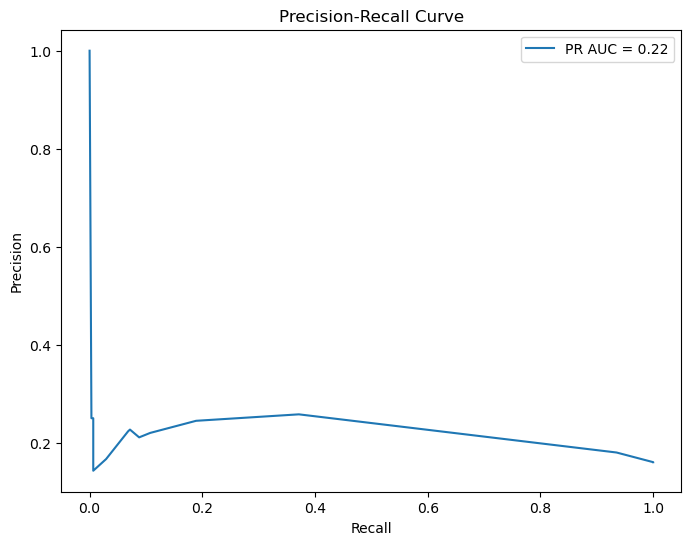

In [249]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_2, precision_2, label=f'PR AUC = {pr_auc_2:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

## Random Forest

### Training a Random Forest Model with split size 0.3

#### Test train split

In [250]:
xtrain_3,xtest_3,ytrain_3,ytest_3 = train_test_split(x,y,test_size=0.3,stratify=y,random_state=99)

In [251]:
xtrain_3.shape,xtest_3.shape,ytrain_3.shape,ytest_3.shape

((6704, 19), (2874, 19), (6704,), (2874,))

#### Model training

In [252]:
rfm = RandomForestClassifier()

In [253]:
rfm.fit(xtrain_3, ytrain_3)

RandomForestClassifier()

#### Accuracy

In [254]:
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(rfm.score(xtrain_3, ytrain_3)))

Accuracy of logistic regression classifier on train set: 1.000


In [255]:
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(rfm.score(xtest_3, ytest_3)))

Accuracy of logistic regression classifier on test set: 0.837


#### Dealing with overfitting

In [256]:
rfm = RandomForestClassifier(min_samples_split=25,min_samples_leaf=30)
rfm.fit(xtrain_3, ytrain_3)
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(rfm.score(xtrain_3, ytrain_3)))
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(rfm.score(xtest_3, ytest_3)))

Accuracy of logistic regression classifier on train set: 0.840
Accuracy of logistic regression classifier on test set: 0.840


In [257]:
rfm = RandomForestClassifier(max_depth=6)
rfm.fit(xtrain_3, ytrain_3)
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(rfm.score(xtrain_3, ytrain_3)))
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(rfm.score(xtest_3, ytest_3)))

Accuracy of logistic regression classifier on train set: 0.842
Accuracy of logistic regression classifier on test set: 0.840


#### Hyperparameter Tuning

In [258]:
from tqdm import tqdm_notebook

In [259]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in tqdm_notebook(range(1,nsimu)):
    rfc = RandomForestClassifier(n_estimators=i*10,min_samples_split=10,max_depth=None,criterion='gini',n_jobs=-1)
    rfc.fit(xtrain_3, ytrain_3)
    rfc_pred = rfc.predict(xtest_3)
    cm = confusion_matrix(ytest_3,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*100

  0%|          | 0/20 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

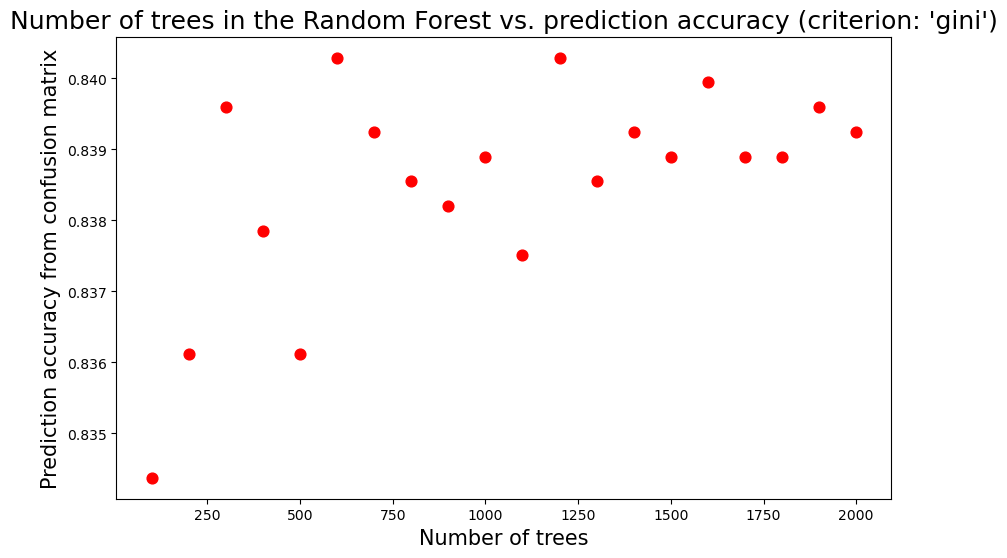

In [260]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'gini')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [261]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in tqdm_notebook(range(1,nsimu)):
    rfc = RandomForestClassifier(n_estimators=i*10,min_samples_split=10,max_depth=None,criterion='entropy',n_jobs=-1)
    rfc.fit(xtrain_3, ytrain_3)
    rfc_pred = rfc.predict(xtest_3)
    cm = confusion_matrix(ytest_3,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*100

  0%|          | 0/20 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

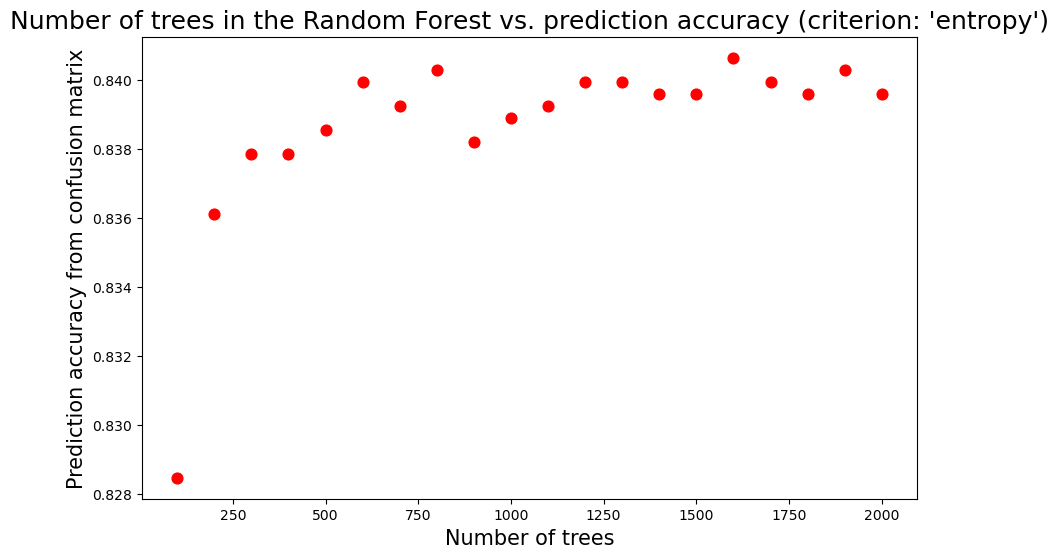

In [262]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'entropy')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

#### Confusion Matrix 

In [263]:
ypred_3 = rfm.predict(xtest_3)

```python
confusion_matrix = confusion_matrix(ytest_3, ypred_3)
print(confusion_matrix)
```

###### Alternate Way

In [264]:
ytest_3.shape,ypred_3.shape

((2874,), (2874,))

In [265]:
pd.crosstab(ytest_3, ypred_3, rownames=['Actual'], colnames=['Predicted'], margins=True)

<IPython.core.display.Javascript object>

Predicted,0,All
Actual,,
0,2414,2414
1,460,460
All,2874,2874


#### Metrices Report

In [266]:
print(classification_report(ytest_3, ypred_3))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2414
           1       0.00      0.00      0.00       460

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.71      0.84      0.77      2874



In [267]:
y_pred_proba_3 = rfm.predict_proba(xtest_3)
y_pred_proba_3

array([[0.85391356, 0.14608644],
       [0.88044223, 0.11955777],
       [0.8423455 , 0.1576545 ],
       ...,
       [0.73854319, 0.26145681],
       [0.77201005, 0.22798995],
       [0.81860501, 0.18139499]])

In [268]:
y_pred_proba_3 = y_pred_proba_3[:,1]
y_pred_proba_3

array([0.14608644, 0.11955777, 0.1576545 , ..., 0.26145681, 0.22798995,
       0.18139499])

#### ROC curve and AUC

In [269]:
# Calculate ROC curve and AUC
roc_auc_3 = roc_auc_score(ytest_3, y_pred_proba_3)
roc_auc_3

0.659364756312813

In [270]:
fpr_3, tpr_3, thresholds_3 = roc_curve(ytest_3, y_pred_proba_3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

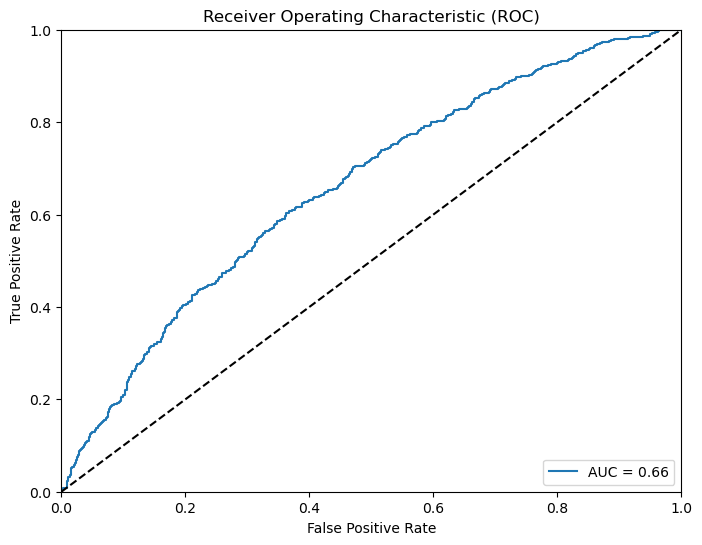

In [271]:
# Plot ROC curve and Show AUC value
plt.figure(figsize=(8, 6))
plt.plot(fpr_3, tpr_3, label=f'AUC = {roc_auc_3:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [272]:
# Calculate precision-recall curve
precision_3, recall_3, thresholds_3 = precision_recall_curve(ytest_3, y_pred_proba_3)
pr_auc_3 = auc(recall_3, precision_3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

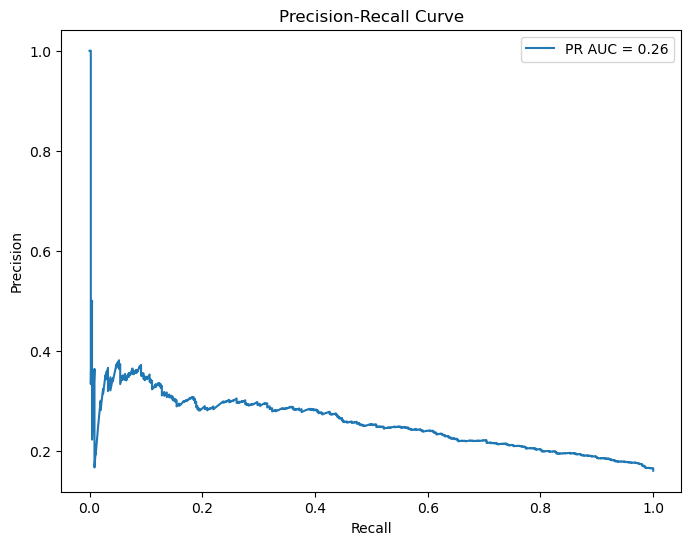

In [273]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_3, precision_3, label=f'PR AUC = {pr_auc_3:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

### Training a Decision Tree Model with split size 0.25

#### Test train split

In [274]:
xtrain_25,xtest_25,ytrain_25,ytest_25 = train_test_split(x,y,test_size=0.25,stratify=y,random_state=99)

In [275]:
xtrain_25.shape,xtest_25.shape,ytrain_25.shape,ytest_25.shape

((7183, 19), (2395, 19), (7183,), (2395,))

#### Model training

In [276]:
rfm_25 = RandomForestClassifier()

In [277]:
rfm_25.fit(xtrain_25, ytrain_25)

RandomForestClassifier()

#### Accuracy

In [278]:
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(rfm_25.score(xtrain_25, ytrain_25)))

Accuracy of logistic regression classifier on train set: 1.000


In [279]:
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(rfm_25.score(xtest_25, ytest_25)))

Accuracy of logistic regression classifier on test set: 0.840


#### Dealing with overfitting

In [280]:
rfm_25 = RandomForestClassifier(min_samples_split=25,min_samples_leaf=30)
rfm_25.fit(xtrain_25, ytrain_25)
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(rfm_25.score(xtrain_25, ytrain_25)))
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(rfm_25.score(xtest_25, ytest_25)))

Accuracy of logistic regression classifier on train set: 0.840
Accuracy of logistic regression classifier on test set: 0.840


In [281]:
rfm_25 = RandomForestClassifier(max_depth=5)
rfm_25.fit(xtrain_25, ytrain_25)
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(rfm_25.score(xtrain_25, ytrain_25)))
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(rfm_25.score(xtest_25, ytest_25)))

Accuracy of logistic regression classifier on train set: 0.840
Accuracy of logistic regression classifier on test set: 0.840


#### Hyperparameter Tuning

In [282]:
from tqdm import tqdm_notebook

In [283]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in tqdm_notebook(range(1,nsimu)):
    rfc = RandomForestClassifier(n_estimators=i*10,min_samples_split=10,max_depth=None,criterion='gini',n_jobs=-1)
    rfc.fit(xtrain_25, ytrain_25)
    rfc_pred = rfc.predict(xtest_25)
    cm = confusion_matrix(ytest_25,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*100

  0%|          | 0/20 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

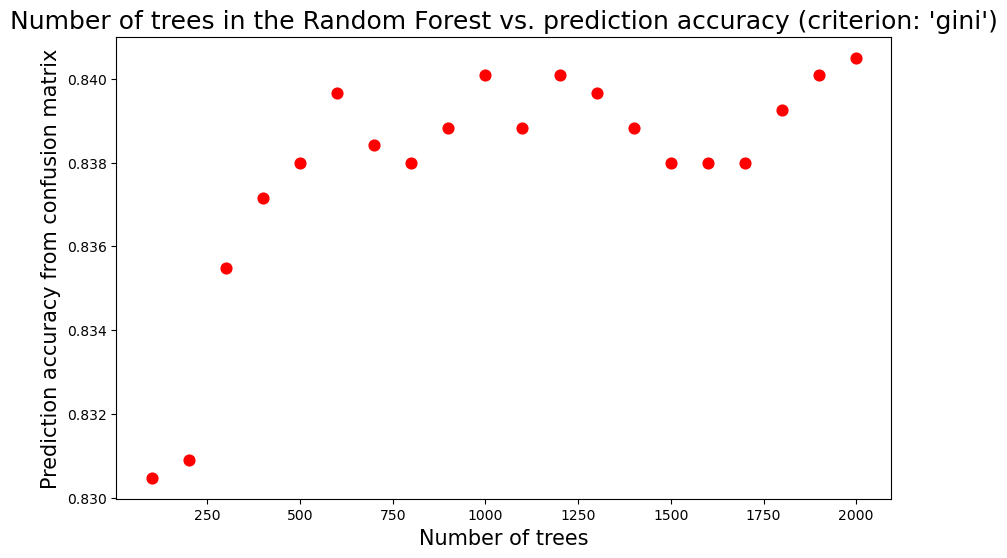

In [284]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'gini')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [285]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in tqdm_notebook(range(1,nsimu)):
    rfc = RandomForestClassifier(n_estimators=i*10,min_samples_split=10,max_depth=None,criterion='entropy',n_jobs=-1)
    rfc.fit(xtrain_25, ytrain_25)
    rfc_pred = rfc.predict(xtest_25)
    cm = confusion_matrix(ytest_25,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*100

  0%|          | 0/20 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

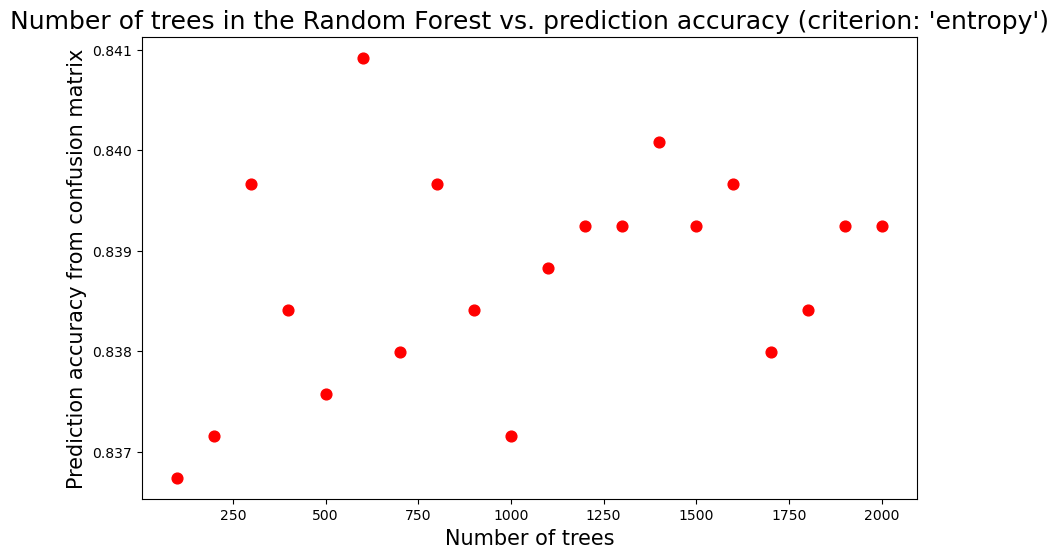

In [286]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'entropy')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

#### Confusion Matrix 

In [287]:
ypred_25 = rfm_25.predict(xtest_25)

```python
confusion_matrix = confusion_matrix(ytest_3, ypred_3)
print(confusion_matrix)
```

###### Alternate Way

In [288]:
ytest_25.shape,ypred_25.shape

((2395,), (2395,))

In [289]:
pd.crosstab(ytest_25, ypred_25, rownames=['Actual'], colnames=['Predicted'], margins=True)

<IPython.core.display.Javascript object>

Predicted,0,All
Actual,,
0,2012,2012
1,383,383
All,2395,2395


#### Metrices Report

In [290]:
print(classification_report(ytest_25, ypred_25))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2012
           1       0.00      0.00      0.00       383

    accuracy                           0.84      2395
   macro avg       0.42      0.50      0.46      2395
weighted avg       0.71      0.84      0.77      2395



In [291]:
y_pred_proba_25 = rfm_25.predict_proba(xtest_25)
y_pred_proba_25

array([[0.76020485, 0.23979515],
       [0.73392942, 0.26607058],
       [0.76129807, 0.23870193],
       ...,
       [0.85499874, 0.14500126],
       [0.861782  , 0.138218  ],
       [0.85582316, 0.14417684]])

In [292]:
y_pred_proba_25 = y_pred_proba_25[:,1]
y_pred_proba_25

array([0.23979515, 0.26607058, 0.23870193, ..., 0.14500126, 0.138218  ,
       0.14417684])

#### ROC curve and AUC

In [293]:
# Calculate ROC curve and AUC
roc_auc_25 = roc_auc_score(ytest_25, y_pred_proba_25)
roc_auc_25

0.6472996226297567

In [294]:
fpr_25, tpr_25, thresholds_25 = roc_curve(ytest_25, y_pred_proba_25)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

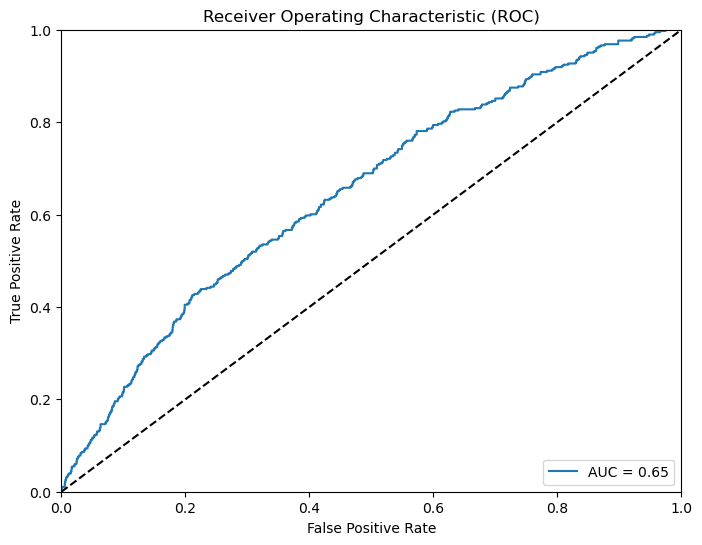

In [295]:
# Plot ROC curve and Show AUC value
plt.figure(figsize=(8, 6))
plt.plot(fpr_25, tpr_25, label=f'AUC = {roc_auc_25:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [296]:
# Calculate precision-recall curve
precision_25, recall_25, thresholds_25 = precision_recall_curve(ytest_25, y_pred_proba_25)
pr_auc_25 = auc(recall_25, precision_25)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

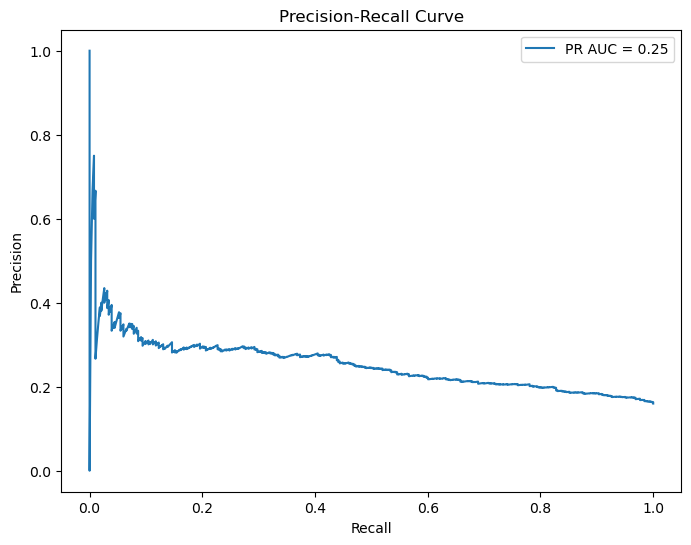

In [297]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_25, precision_25, label=f'PR AUC = {pr_auc_25:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

### Training a Decision Tree Model with split size 0.2

#### Test train split

In [298]:
xtrain_2,xtest_2,ytrain_2,ytest_2 = train_test_split(x,y,test_size=0.2,stratify=y,random_state=99)

In [299]:
xtrain_2.shape,xtest_2.shape,ytrain_2.shape,ytest_2.shape

((7662, 19), (1916, 19), (7662,), (1916,))

#### Model training

In [300]:
rfm_2 = RandomForestClassifier()

In [301]:
rfm_2.fit(xtrain_2, ytrain_2)

RandomForestClassifier()

#### Accuracy

In [302]:
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(rfm_2.score(xtrain_2, ytrain_2)))

Accuracy of logistic regression classifier on train set: 1.000


In [303]:
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(rfm_2.score(xtest_2, ytest_2)))

Accuracy of logistic regression classifier on test set: 0.840


#### Dealing with overfitting

In [304]:
rfm_2 = RandomForestClassifier(min_samples_split=25,min_samples_leaf=30)
rfm_2.fit(xtrain_2, ytrain_2)
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(rfm_2.score(xtrain_2, ytrain_2)))
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(rfm_2.score(xtest_2, ytest_2)))

Accuracy of logistic regression classifier on train set: 0.840
Accuracy of logistic regression classifier on test set: 0.840


In [305]:
rfm_2 = RandomForestClassifier(max_depth=5)
rfm_2.fit(xtrain_2, ytrain_2)
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(rfm_2.score(xtrain_2, ytrain_2)))
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(rfm_2.score(xtest_2, ytest_2)))

Accuracy of logistic regression classifier on train set: 0.840
Accuracy of logistic regression classifier on test set: 0.840


#### Hyperparameter Tuning

In [306]:
from tqdm import tqdm_notebook

In [307]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in tqdm_notebook(range(1,nsimu)):
    rfc = RandomForestClassifier(n_estimators=i*10,min_samples_split=10,max_depth=None,criterion='gini',n_jobs=-1)
    rfc.fit(xtrain_2, ytrain_2)
    rfc_pred = rfc.predict(xtest_2)
    cm = confusion_matrix(ytest_2,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*100

  0%|          | 0/20 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

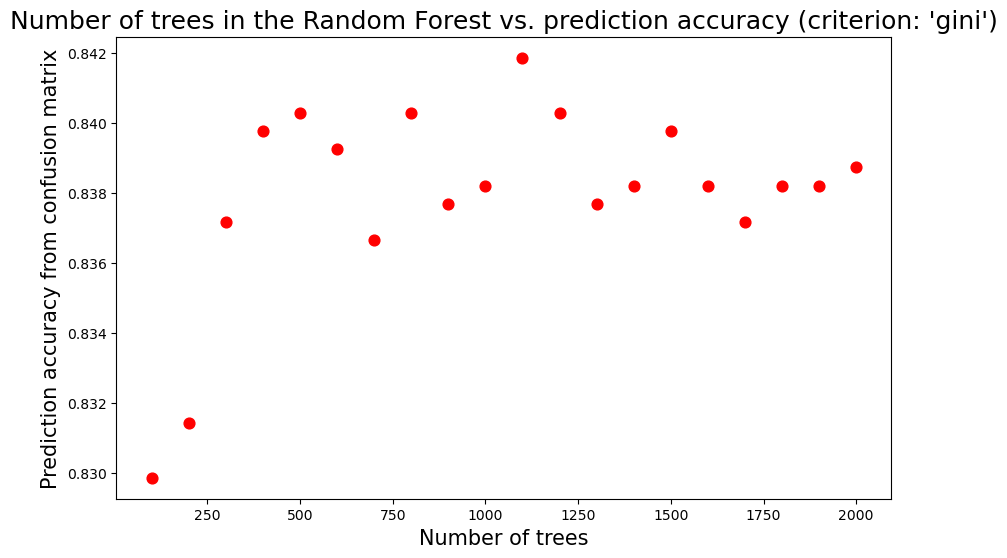

In [308]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'gini')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [309]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in tqdm_notebook(range(1,nsimu)):
    rfc = RandomForestClassifier(n_estimators=i*10,min_samples_split=10,max_depth=None,criterion='entropy',n_jobs=-1)
    rfc.fit(xtrain_2, ytrain_2)
    rfc_pred = rfc.predict(xtest_2)
    cm = confusion_matrix(ytest_2,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*100

  0%|          | 0/20 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

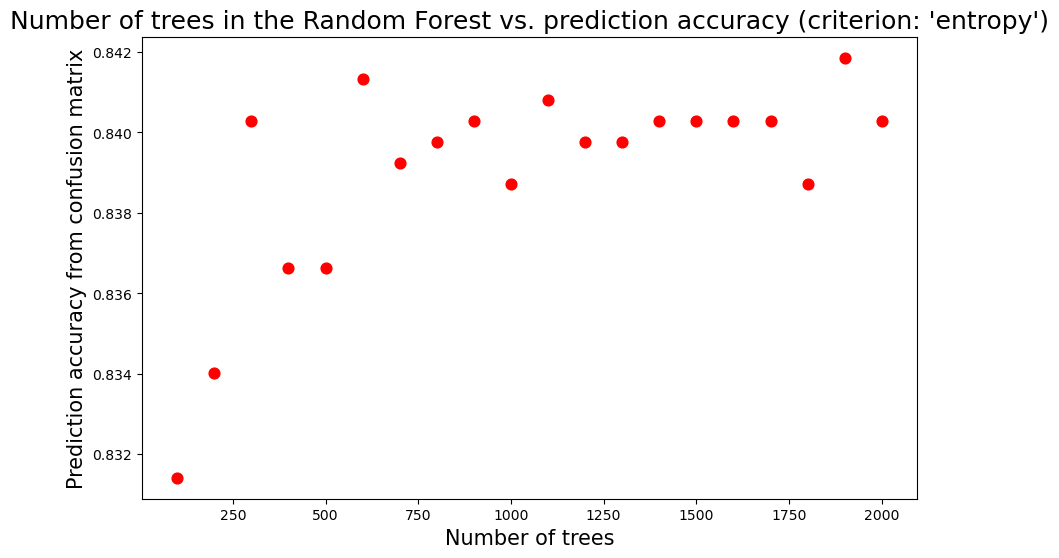

In [310]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'entropy')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

#### Confusion Matrix 

In [311]:
ypred_2 = rfm_2.predict(xtest_2)

```python
confusion_matrix = confusion_matrix(ytest_3, ypred_3)
print(confusion_matrix)
```

###### Alternate Way

In [312]:
ytest_2.shape,ypred_2.shape

((1916,), (1916,))

In [313]:
pd.crosstab(ytest_2, ypred_2, rownames=['Actual'], colnames=['Predicted'], margins=True)

<IPython.core.display.Javascript object>

Predicted,0,All
Actual,,
0,1609,1609
1,307,307
All,1916,1916


#### Metrices Report

In [314]:
print(classification_report(ytest_2, ypred_2))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1609
           1       0.00      0.00      0.00       307

    accuracy                           0.84      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.71      0.84      0.77      1916



In [315]:
y_pred_proba_2 = rfm_2.predict_proba(xtest_2)
y_pred_proba_2

array([[0.92314295, 0.07685705],
       [0.85539709, 0.14460291],
       [0.82854676, 0.17145324],
       ...,
       [0.82038781, 0.17961219],
       [0.90233927, 0.09766073],
       [0.68426199, 0.31573801]])

In [316]:
y_pred_proba_2 = y_pred_proba_2[:,1]
y_pred_proba_2

array([0.07685705, 0.14460291, 0.17145324, ..., 0.17961219, 0.09766073,
       0.31573801])

#### ROC curve and AUC

In [317]:
# Calculate ROC curve and AUC
roc_auc_2 = roc_auc_score(ytest_2, y_pred_proba_2)
roc_auc_2

0.6585776667483192

In [318]:
fpr_2, tpr_2, thresholds_2 = roc_curve(ytest_2, y_pred_proba_2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

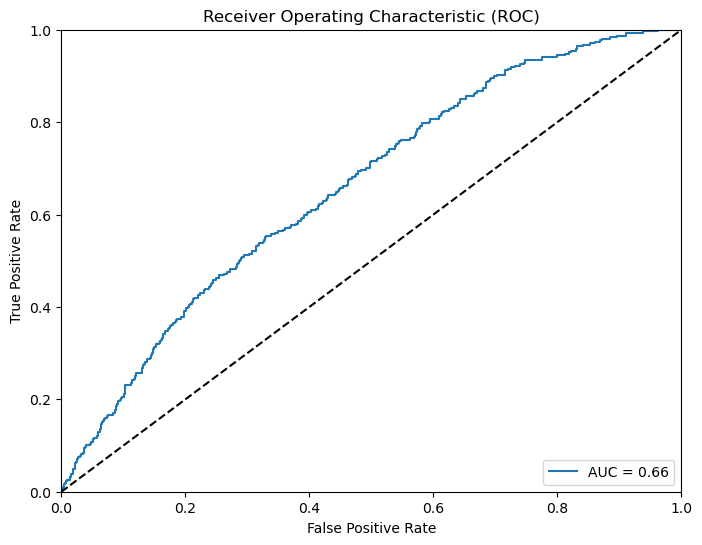

In [319]:
# Plot ROC curve and Show AUC value
plt.figure(figsize=(8, 6))
plt.plot(fpr_2, tpr_2, label=f'AUC = {roc_auc_2:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [320]:
# Calculate precision-recall curve
precision_2, recall_2, thresholds_2 = precision_recall_curve(ytest_2, y_pred_proba_2)
pr_auc_2 = auc(recall_2, precision_2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

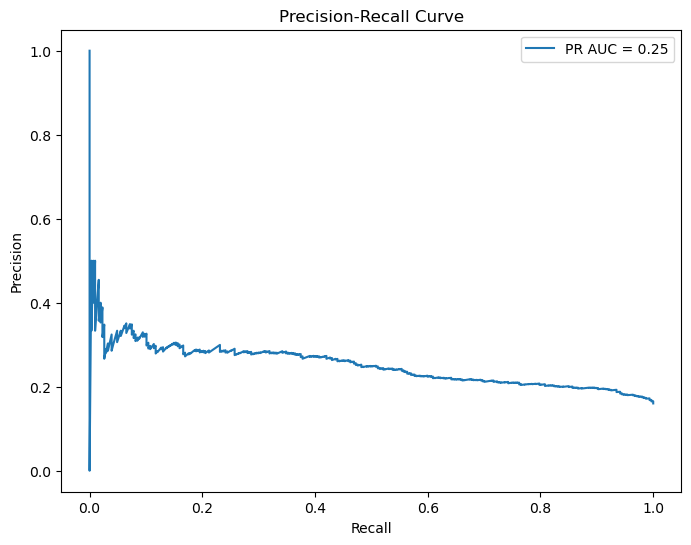

In [321]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_2, precision_2, label=f'PR AUC = {pr_auc_2:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()